In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [4]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## First, let's look at the distribution of ApplicantIncome and Loan_Amount

c:\users\prateek\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


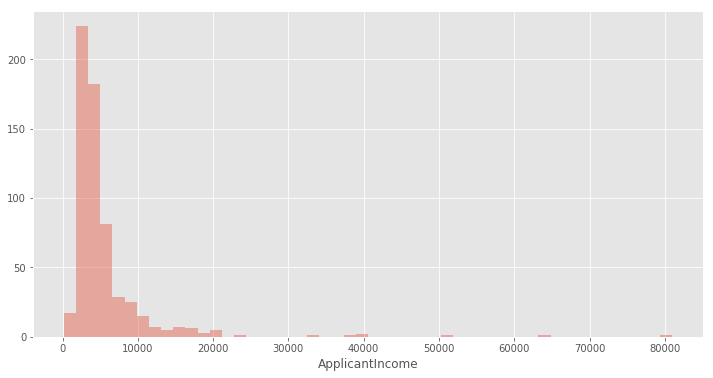

In [8]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.distplot(train['ApplicantIncome'], kde=False)

### We can see that the income of most applicants fall between 2,000 to 8,000. Also, the distribution has a long tail, which indicates the presence of outliers in applicant incomes.

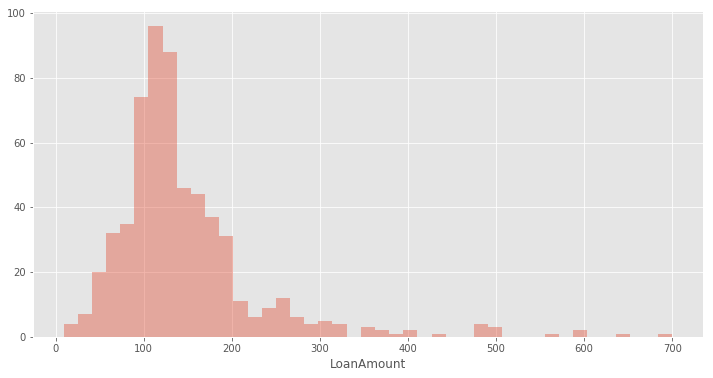

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['LoanAmount'].notnull()]['LoanAmount'], kde=False)

### We observe that most of the loan amounts lie between 50 to 200. This distribution also has a long tail, indicating the presence of extreme values (or outliers) in loan amounts.

## Does education have an effect on income?#

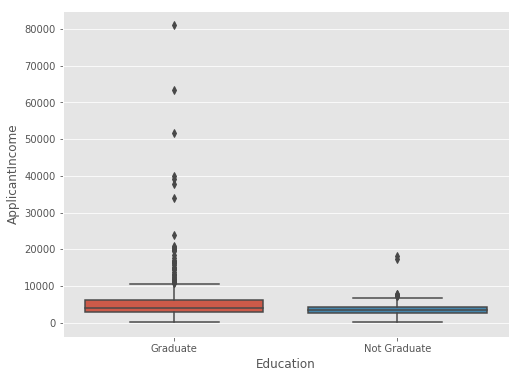

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='ApplicantIncome', data=train)

### This boxplot shows that graduates have slightly higher median income than non-graduates.#

## Are self-employed people likely to have higher income than non-self employed people? #

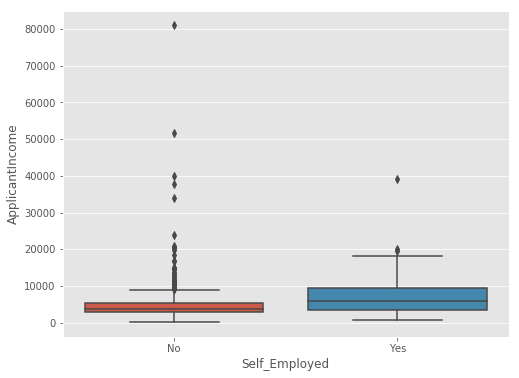

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=train)

### Yes, Self employed people have a higher income, as compared to their non-self employed counteparts.#

## Is there a correlation between LoanAmount and Self_Emplyed?#

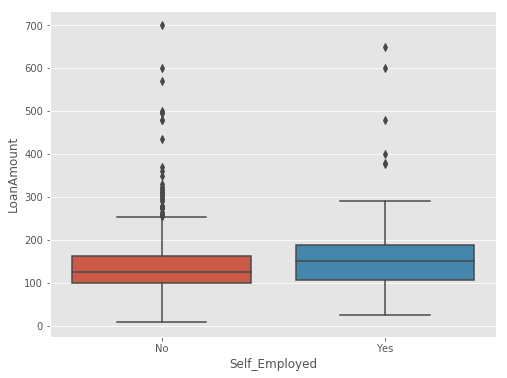

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Self_Employed', y='LoanAmount', data=train)

### This shows that self employed people have applied for a higher loan amount than non self-employed people#

## Is there any corelation between credit history and loan status?

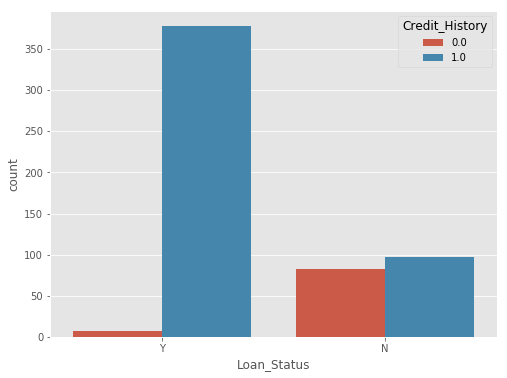

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=train, hue='Credit_History')

### We can see that the loan is more likely to be approved if the Credit_History is 1.

In [14]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [15]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

# Let's fill in the missing values

In [16]:
train['Married'].fillna(train.Married.mode()[0], inplace=True)

In [17]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
train['Gender'].fillna(train.Gender.mode()[0], inplace=True)

In [19]:
test['Gender'].fillna(train.Gender.mode()[0], inplace=True)

In [20]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [21]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [22]:
train.groupby(['Education', 'Self_Employed'])['LoanAmount'].median()

Education     Self_Employed
Graduate      No               130.0
              Yes              157.5
Not Graduate  No               113.0
              Yes              130.0
Name: LoanAmount, dtype: float64

In [23]:
train.loc[((train.LoanAmount.isnull()) & (train.Education=='Graduate') & (train.Self_Employed=='No')), 'LoanAmount'] = 130
train.loc[((train.LoanAmount.isnull()) & (train.Education=='Graduate') & (train.Self_Employed=='Yes')), 'LoanAmount'] = 157.5
train.loc[((train.LoanAmount.isnull()) & (train.Education=='Not Graduate') & (train.Self_Employed=='No')), 'LoanAmount'] = 113
train.loc[((train.LoanAmount.isnull()) & (train.Education=='Not Graduate') & (train.Self_Employed=='Yes')), 'LoanAmount'] = 130

test.loc[((test.LoanAmount.isnull()) & (test.Education=='Graduate') & (test.Self_Employed=='No')), 'LoanAmount'] = 130
test.loc[((test.LoanAmount.isnull()) & (test.Education=='Graduate') & (test.Self_Employed=='Yes')), 'LoanAmount'] = 157.5
test.loc[((test.LoanAmount.isnull()) & (test.Education=='Not Graduate') & (test.Self_Employed=='No')), 'LoanAmount'] = 113
test.loc[((test.LoanAmount.isnull()) & (test.Education=='Not Graduate') & (test.Self_Employed=='Yes')), 'LoanAmount'] = 130

In [24]:
train[train.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [25]:
train.loc[train.LoanAmount.isnull(), 'LoanAmount'] = train[train.Education=='Graduate']['LoanAmount'].median()

In [26]:
train.groupby('Self_Employed')['ApplicantIncome'].median()

Self_Employed
No     3705.5
Yes    5809.0
Name: ApplicantIncome, dtype: float64

In [27]:
train.loc[((train.Self_Employed.isnull()) & (train.ApplicantIncome>=5809)), 'Self_Employed'] = 'Yes'
train.loc[((train.Self_Employed.isnull()) & (train.ApplicantIncome<=3705)), 'Self_Employed'] = 'No'

test.loc[((test.Self_Employed.isnull()) & (test.ApplicantIncome>=5809)), 'Self_Employed'] = 'Yes'
test.loc[((test.Self_Employed.isnull()) & (test.ApplicantIncome<=3705)), 'Self_Employed'] = 'No'

In [28]:
train.Self_Employed.value_counts()

No     517
Yes     87
Name: Self_Employed, dtype: int64

In [29]:
train['Self_Employed'].fillna('No', inplace=True)

In [30]:
test['Self_Employed'].fillna('No', inplace=True)

In [31]:
train['Credit_History'] = train['Credit_History'].fillna(train['Loan_Status'].map({'N':0.0, 'Y':1.0}))

In [32]:
train.Credit_History.value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

In [33]:
test['Credit_History'].fillna(1.0, inplace=True)

In [34]:
all_data = pd.concat([train.drop('Loan_Status', axis=1), test], axis=0).reset_index(drop=True)

In [35]:
all_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
all_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


# Feature engineering

In [37]:
all_data['Loan_Income_ratio'] = all_data['LoanAmount']/(all_data['ApplicantIncome']+all_data['CoapplicantIncome'])

In [38]:
all_data['Loan_load'] = all_data['LoanAmount']/all_data['Loan_Amount_Term']

In [39]:
all_data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Income_ratio,Loan_load
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,0.022226,0.361111
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.021015,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0.022000,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0.024287,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0.023500,0.391667
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,0.027775,0.741667
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,0.024682,0.263889
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0.028520,0.438889


In [40]:
all_data.skew()

ApplicantIncome       7.086961
CoapplicantIncome     6.844109
LoanAmount            2.760024
Loan_Amount_Term     -2.513729
Credit_History       -1.816479
Loan_Income_ratio     1.580105
Loan_load            16.965601
dtype: float64

In [41]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [42]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Income_ratio', 'Loan_load']:
    all_data[col] = boxcox1p(all_data[col], boxcox_normmax(1+all_data[col]))

In [43]:
all_data.skew()

ApplicantIncome      0.691903
CoapplicantIncome    0.611478
LoanAmount           0.042647
Loan_Amount_Term    -0.929465
Credit_History      -1.816479
Loan_Income_ratio   -0.196355
Loan_load           -0.030179
dtype: float64

In [44]:
all_data.drop('Loan_ID', axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label_enc = LabelEncoder()

In [47]:
labels= [col for col in all_data if all_data[col].dtypes==object]

In [48]:
for col in labels:
    all_data[col] = label_enc.fit_transform(all_data[col])

In [49]:
all_data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Income_ratio    float64
Loan_load            float64
dtype: object

In [50]:
training = all_data[:len(train)]
testing = all_data[len(train):]

In [51]:
y = train.Loan_Status

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [75]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=11)

In [76]:
acc_score = cross_val_score(rfc, X=training, y=y, cv=10, scoring='accuracy')

In [77]:
print('The accuracy score using Random Forest is : ',np.mean(acc_score)*100,'%')

The accuracy score using Random Forest is :  82.24043715846993 %


In [78]:
rfc.fit(training, y)
pred = rfc.predict(testing)
pred = pd.DataFrame(pred, index=test.Loan_ID, columns=['Loan_Status'])

In [79]:
pred.to_csv('Loan Prediction-Solution.csv')

In [80]:
#Rank:  200/4079
#Score: 0.7986111111111112